**Applying XGBoost algorithm on the Boston housing dataset to predict the median value. Do the usual train/test split and then compare the result with the result of applying linear regression. You can use a suitable metric like RMSE.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
dataset=pd.read_excel("boston housing.xls")

In [3]:
print(dataset.shape)
dataset.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


In [4]:
#Calculating missing values in the dataframe
dataset.isnull().sum()

CRIM     0
ZN       0
INDUS    0
CHAS     0
NOX      0
RM       0
AGE      0
DIS      0
RAD      0
TAX      0
PT       0
B        0
LSTAT    0
MV       0
dtype: int64

In [5]:
X=dataset.iloc[:,:-1]
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33


In [6]:
y=dataset.iloc[:,-1]
y.head()

0    24.000000
1    21.600000
2    34.700001
3    33.400002
4    36.200001
Name: MV, dtype: float64

In [7]:
#Calculating the correlation coefficient between all pairs of columns
correlation = dataset.corr()
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355502,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


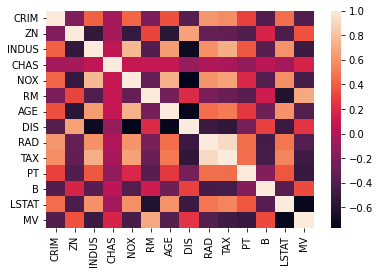

In [8]:
#Using the heatmap function to visualize the correlation 
sns.heatmap(dataset.corr());

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(354, 13)
(354,)
(152, 13)
(152,)


In [11]:
from xgboost.sklearn import XGBRegressor
xgb_linear=XGBRegressor(objective='reg:linear')    

In [12]:
xgb_linear.fit(X_train,y_train) 

[02:14:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [13]:
y_pred_XGB = xgb_linear.predict(X_test)

In [14]:
import numpy as np
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(y_test,y_pred_XGB ))
print("RMSE : % f" %(rmse))                                                       #RMSE of XGBRegressor model
print("Accuracy:",xgb_linear.score(X_test,y_test))                                #Accuracy of XGBRegressor model 

RMSE :  3.962288
Accuracy: 0.8114498292759302


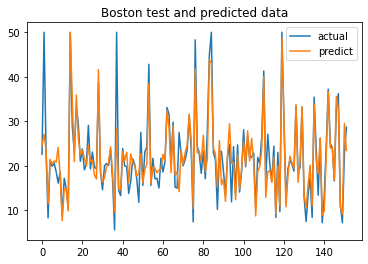

In [15]:
from matplotlib import pyplot as plt
x_ax=range(len(y_test))
plt.plot(x_ax,y_test,label="actual")
plt.plot(x_ax,y_pred_XGB,label = "predict")
plt.title("Boston test and predicted data")
plt.legend()
plt.show()

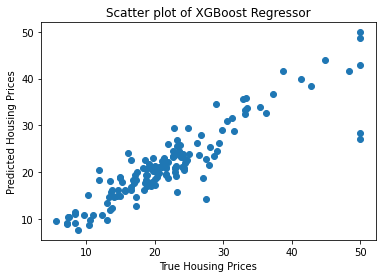

In [16]:
plt.scatter(y_test, y_pred_XGB)
plt.xlabel("True Housing Prices")
plt.ylabel("Predicted Housing Prices")
plt.title("Scatter plot of XGBoost Regressor")
plt.show()

**Plotting XGBRegressor Model**

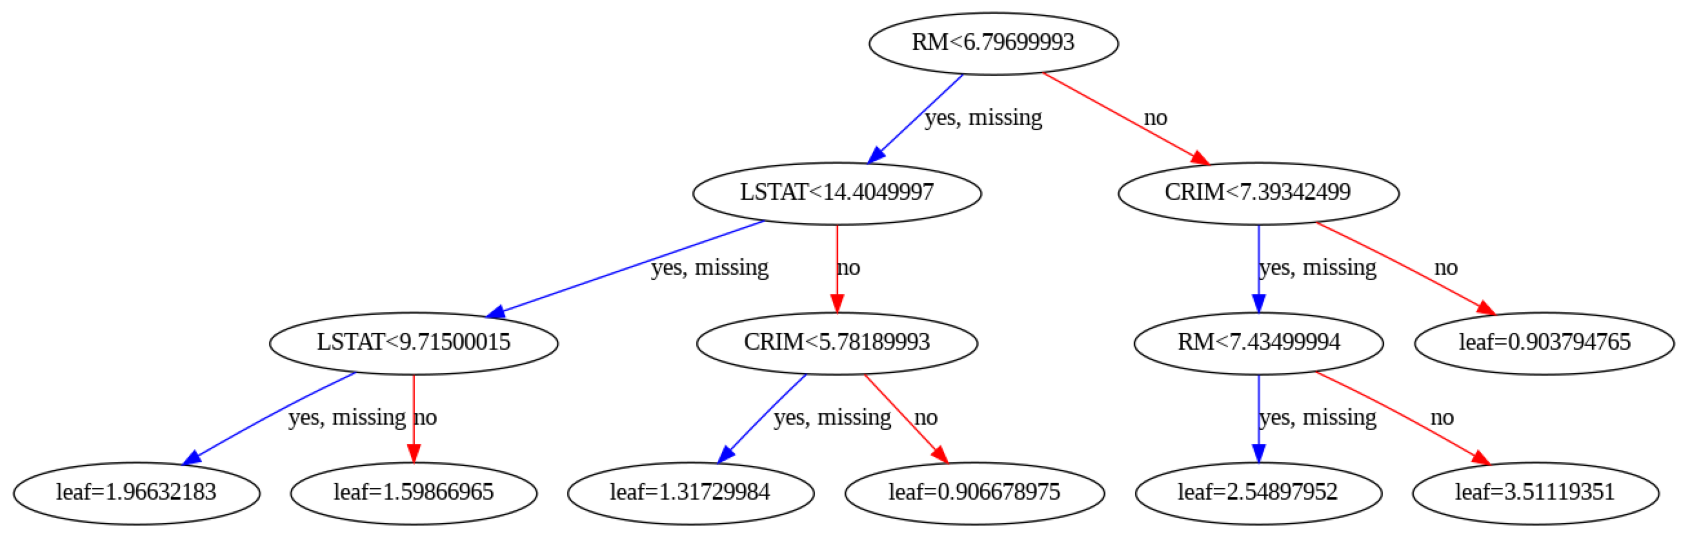

In [17]:
from xgboost import plot_tree
plot_tree(xgb_linear, num_trees=2)
fig1 = plt.gcf()
fig1.set_size_inches(30, 15)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
linear_reg=LinearRegression()
linear_reg.fit(X_train,y_train)                                           # Fitting the Linear Regression Model

LinearRegression()

In [20]:
y_pred_linear=linear_reg.predict(X_test)

In [21]:
import numpy as np
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(y_test,y_pred_linear ))
print("RMSE : % f" %(rmse))

RMSE :  5.214975


In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy=linear_reg.score(X_test,y_test)
print("Accuracy",accuracy)  

Accuracy 0.6733825500869902


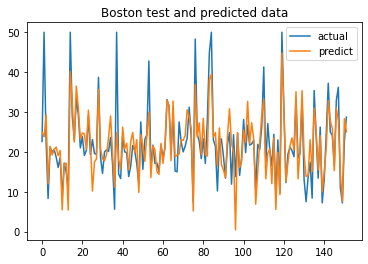

In [23]:
from matplotlib import pyplot as plt
x_ax=range(len(y_test))
plt.plot(x_ax,y_test,label="actual")
plt.plot(x_ax,y_pred_linear,label = "predict")
plt.title("Boston test and predicted data")
plt.legend()
plt.show()

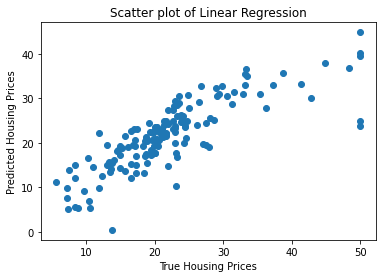

In [24]:
plt.scatter(y_test, y_pred_linear)
plt.xlabel("True Housing Prices")
plt.ylabel("Predicted Housing Prices")
plt.title("Scatter plot of Linear Regression")
plt.show()

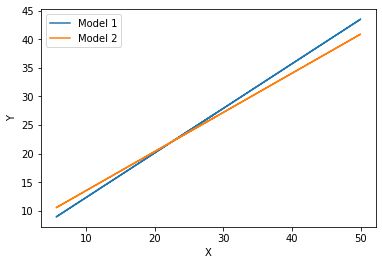

In [26]:
# m1, b1 = np.polyfit(y_test, y_pred_XGB, 1)
# plt.plot(y_test, m1*y_test + b1, label='Model 1')

# # add fitted line for model 2
# m2, b2 = np.polyfit(y_test, y_pred_linear, 1)
# plt.plot(y_test, m2*y_test + b2, label='Model 2')

# # add labels and legend
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.legend()

# # show the plot
# plt.show()
